In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import seaborn as sns
sns.set('poster')

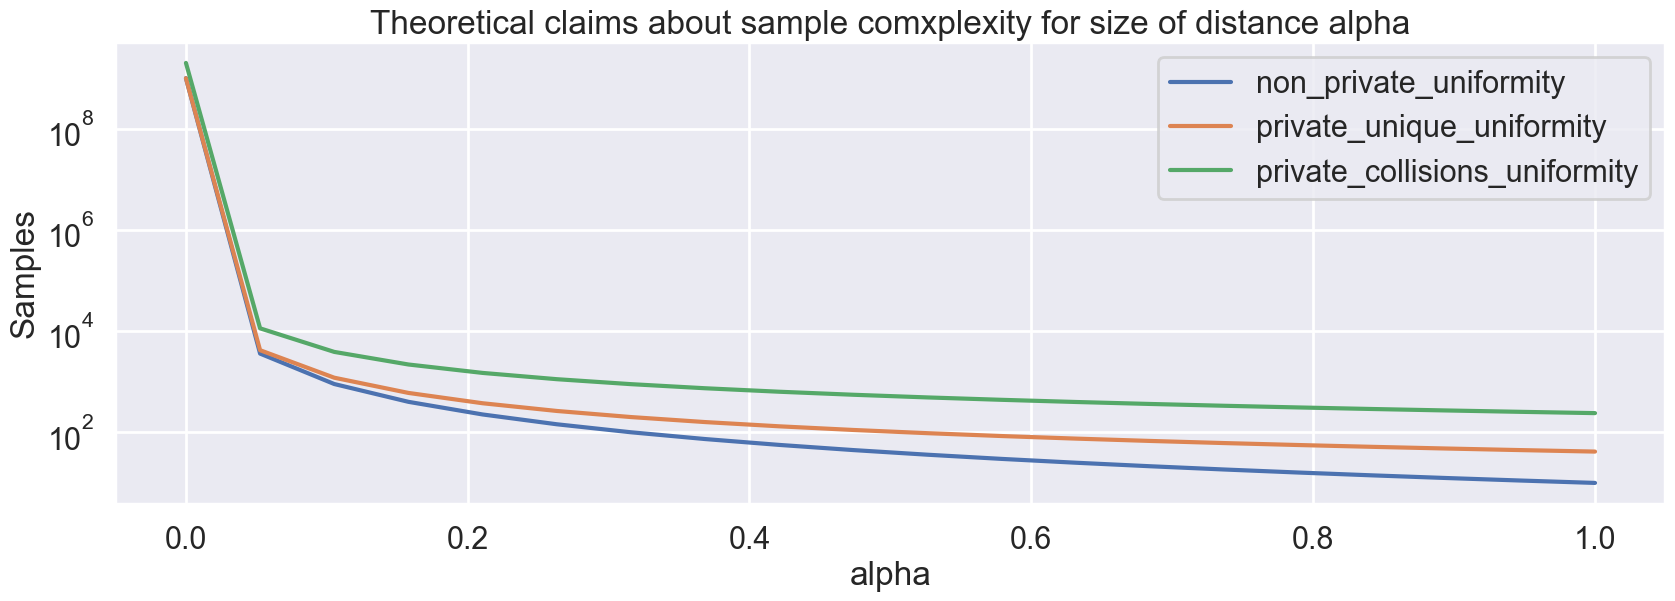

In [37]:
keys = ['non_private_uniformity',
        'private_unique_uniformity',
        'private_collisions_uniformity',
       ]
data_dict = {k:[] for k in keys}
alphas = np.linspace(0.0001, 1, 20)
epsilon = 0.1
k = 100
for alpha in alphas:
    data_dict['non_private_uniformity'].append(np.sqrt(k)/alpha**2)
    data_dict['private_unique_uniformity'].append(np.sqrt(k)/alpha**2 + np.sqrt(k)/(alpha*np.sqrt(epsilon)))
    
    first = np.sqrt(k)/alpha**2 
    second = np.sqrt(k*max(1, np.log(1/epsilon)))/(alpha*epsilon)
    third = np.sqrt(k*np.log(k))/(alpha*np.sqrt(epsilon))
    fourth = 1/(epsilon*alpha**2)    
    data_dict['private_collisions_uniformity'].append(first + second + third + fourth)
    
ax = pd.DataFrame(data_dict, index=alphas).plot(figsize=(20,6))
ax.set_yscale('log')
ax.set_ylabel('Samples')
ax.set_xlabel('alpha')
ax.set_title('Theoretical claims about sample comxplexity for size of distance alpha')        

plt.savefig('/Users/aribiswas/notes/html_files/assets/dependence_on_alpha.png')

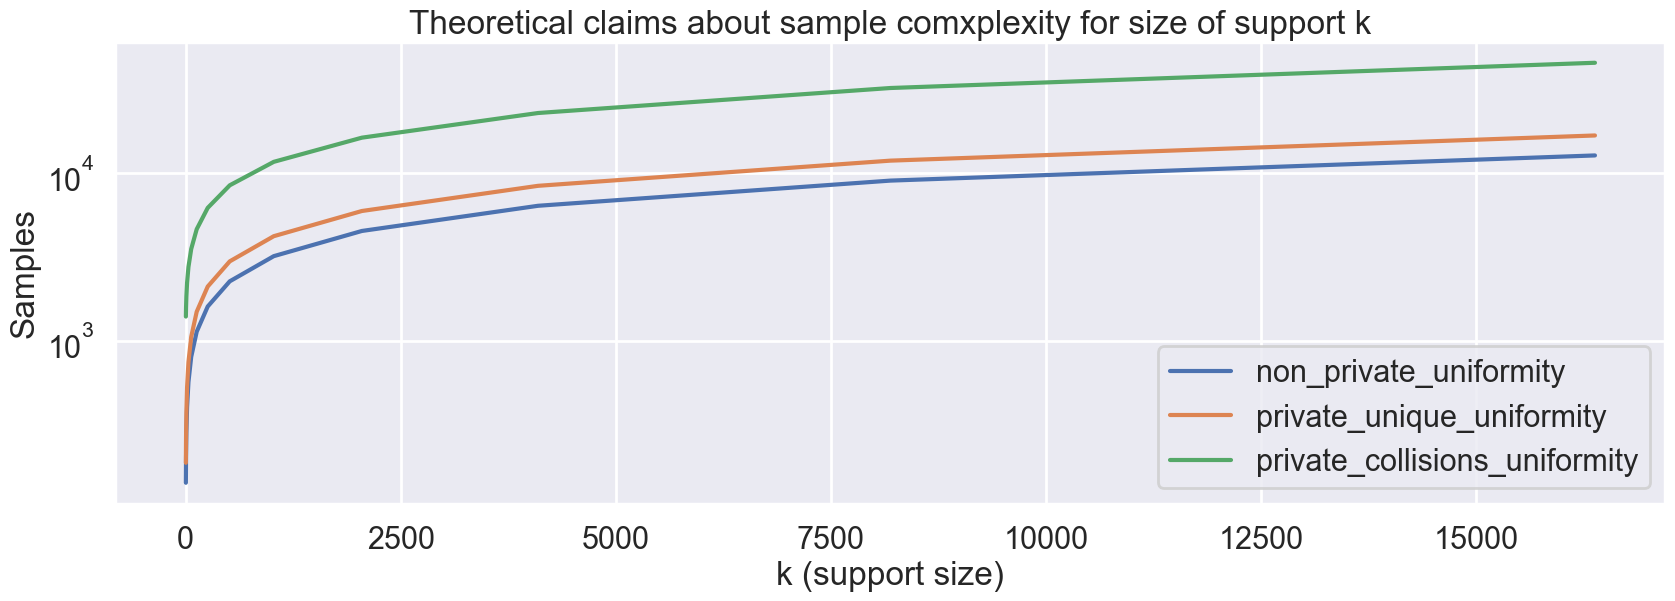

In [36]:
data_dict = {k:[] for k in keys}
epsilon = 0.1
ks = [2**k for k in range(1, 15)]
alpha = 0.1
for k in ks:
    data_dict['non_private_uniformity'].append(np.sqrt(k)/alpha**2)
    data_dict['private_unique_uniformity'].append(np.sqrt(k)/alpha**2 + np.sqrt(k)/(alpha*np.sqrt(epsilon)))

    first = np.sqrt(k)/alpha**2 
    second = np.sqrt(k*max(1, np.log(1/epsilon)))/(alpha*epsilon)
    third = np.sqrt(k*np.log(k))/(alpha*np.sqrt(epsilon))
    fourth = 1/(epsilon*alpha**2)    
    data_dict['private_collisions_uniformity'].append(first + second + third + fourth)

    
    
ax = pd.DataFrame(data_dict, index=ks).plot(figsize=(20,6))
ax.set_yscale('log')
ax.set_ylabel('Samples')
ax.set_xlabel('k (support size)')
ax.set_title('Theoretical claims about sample comxplexity for size of support k')    

plt.savefig('/Users/aribiswas/notes/html_files/assets/dependence_on_k.png')

In [1]:
# Global parameters
k = 100
alpha = 0.1 
epsilon= 0.1

1000

In [241]:
def private_uniqueness_tester(data, alpha, eps, k):
    
    n = len(data)
    temp = Counter(data)
    
    if eps > 0.000000001:
        Z_2 = len([1 for value, count in temp.items() if count == 1])/n + np.random.laplace(scale=2/eps)/n
    else:
        Z_2 = len([1 for value, count in temp.items() if count == 1])/n 
    
    E_U = (1 - 1/k)**(n-1) 
    tau = E_U - 1/16*(n*alpha**2/k)
    
    if(Z_2 <= tau):
        return 0, Z_2
    else:
        return 1, Z_2

    
def collisions_test(data, alpha, eps, k):

    n = len(data)
    n_choose_2 = n*(n-1)/2
    count = get_collisions(data)                
    Z = count/n_choose_2
    
    tau = (1 + 2*alpha**2)/k
    
    if Z >= tau:
        return 0, Z
    else:
        return 1, Z
    
def chi_square_test(data, alpha, eps, k):
    
    n = len(data)
    tau = 2*n*alpha**2
    
    temp = Counter(data)
    N_dict = {}
    for x in range(k):
        if x in temp:
            N_dict[x] = temp[x]
        else:
            N_dict[x] = 0
    
    Z = 0
    for j in range(k):
        Z += ((N_dict[j] - n/k)**2 - N_dict[j])/(n/k)
        
    if Z >= tau:
        return 0, Z
    else:
        return 1, Z
    

0.000118
n:50 Accuracy:0.97


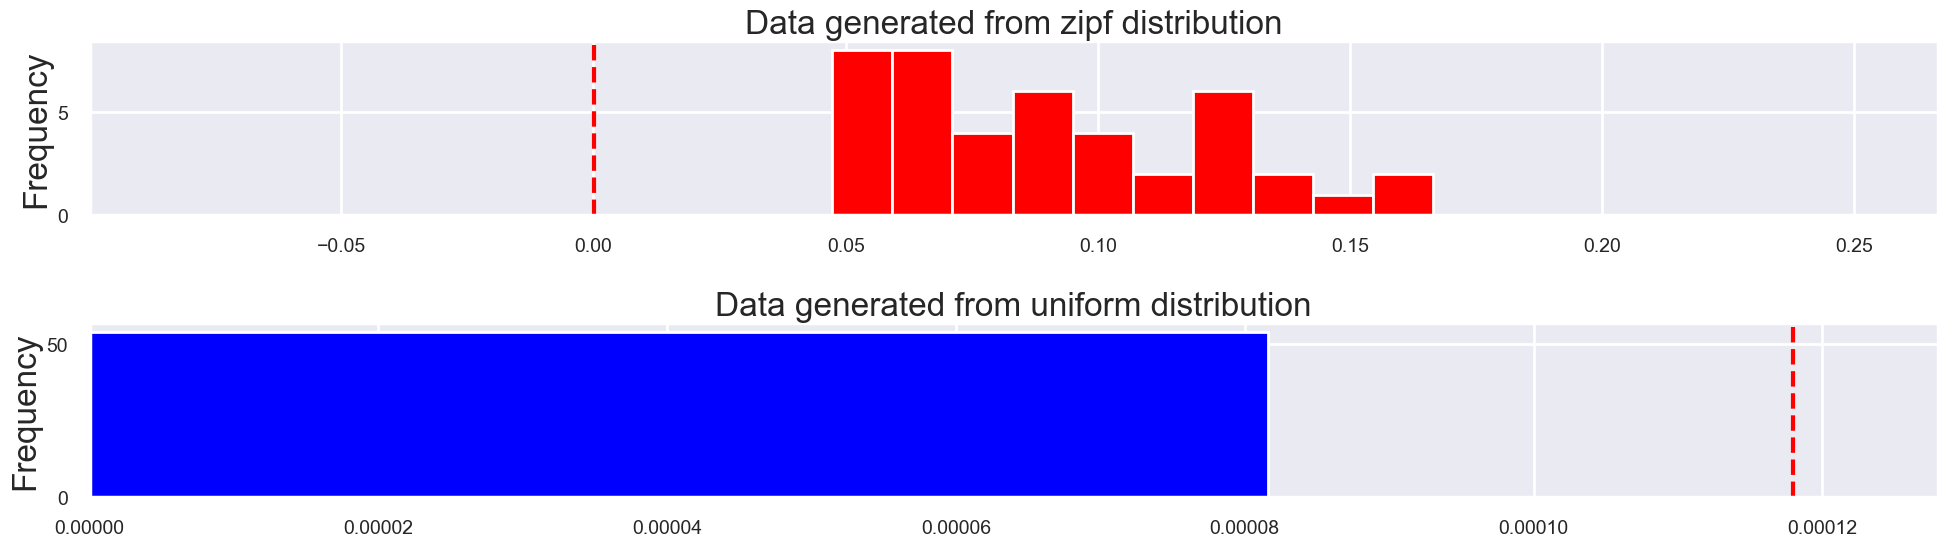

In [249]:
# Collisions based tester
k = 10000
alpha = 0.3
eps = 0.4

n = 50
NUM_TRIALS = 100

tau = (1 + 2*alpha**2)/k
print(tau)

uniform = []
non_uniform = []
count = 0
for trial in range(NUM_TRIALS):
    p = np.random.random() > 0.5
    if p:
        data = generate_uniform(n,k)
        decision, Z = collisions_test(data, alpha, eps, k)
        uniform.append(Z)
    else:
        data = generate_non_uniform(n, k, eps)
        decision, Z = collisions_test(data, alpha, eps, k)
        non_uniform.append(Z)
            
    count += (decision == p)

print('n:{} Accuracy:{}'.format(n, count/NUM_TRIALS))

# Plotting business
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
pd.Series(non_uniform).plot(ax=ax1, figsize=(20, 6), fontsize=14, kind='hist', color='red')
pd.Series(uniform).plot(ax=ax2,figsize=(20, 6), fontsize=14, kind='hist', color='blue')

ax1.axvline(tau, color="red", linestyle="--")
ax2.axvline(tau, color="red", linestyle="--")
ax1.set_xlim([tau - 0.1, max(non_uniform)+0.1])
ax2.set_xlim([0, tau+ 0.00001])

ax1.set_title('Data generated from zipf distribution')
ax2.set_title('Data generated from uniform distribution')

plt.tight_layout()

# Uniqueness tester 

n:35130 Accuracy:0.8


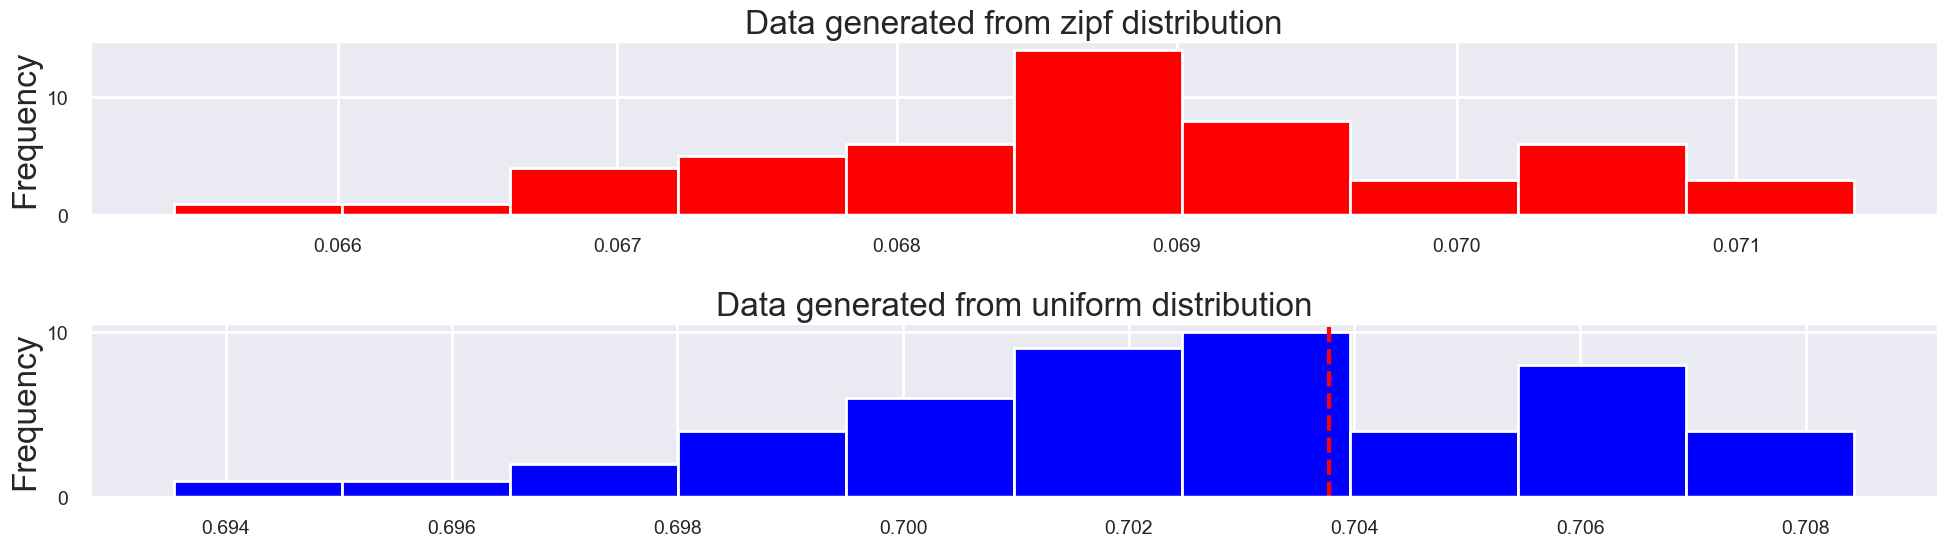

In [246]:
k = 100000
alpha = 0.3
eps = 0

n = 10*int(np.sqrt(k)/alpha**2)
NUM_TRIALS = 100
assert n < k 

uniform = []
non_uniform = []
count = 0
for trial in range(NUM_TRIALS):
    p = np.random.random() > 0.5
    if p:
        data = generate_uniform(n,k)
        decision, Z = private_uniqueness_tester(data, alpha, eps, k)
        uniform.append(Z)
    else:
        data = generate_non_uniform(n, k, eps)
        decision, Z = private_uniqueness_tester(data, alpha, eps, k)        
        non_uniform.append(Z)
            
    count += (decision == p)

print('n:{} Accuracy:{}'.format(n, count/NUM_TRIALS))
tau = (1 - 1/k)**(n-1)  - 1/8*(n*eps**2/k)

# Plotting business
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
pd.Series(non_uniform).plot(ax=ax1, figsize=(20, 6), fontsize=14, kind='hist', color='red')
pd.Series(uniform).plot(ax=ax2,figsize=(20, 6), fontsize=14, kind='hist', color='blue')

# ax1.axvline(tau, color="red", linestyle="--")
ax2.axvline(tau, color="red", linestyle="--")
# ax1.set_xlim([0, tau+0.00000001])
# ax2.set_xlim([tau, max(uniform)])

ax1.set_title('Data generated from zipf distribution')
ax2.set_title('Data generated from uniform distribution')

plt.tight_layout()

In [149]:
def generate_uniform(n, k):
    return np.random.choice(k, size=n)

def generate_non_uniform(n, k, alpha):
    data = []
    while len(data) < n:
        tmp = np.random.zipf(1.3)
        if tmp <= k:
            data.append(tmp)
    return data

    # Increase the number of samples and then check how often we get it wrong

In [150]:
def get_collisions(data):
    n = len(data)
    temp = Counter(data)
    return sum([v*(v-1)/2 for _, v in temp.items()])


In [151]:
data = [1, 1, 1,1, 5]
get_collisions(data)

6.0

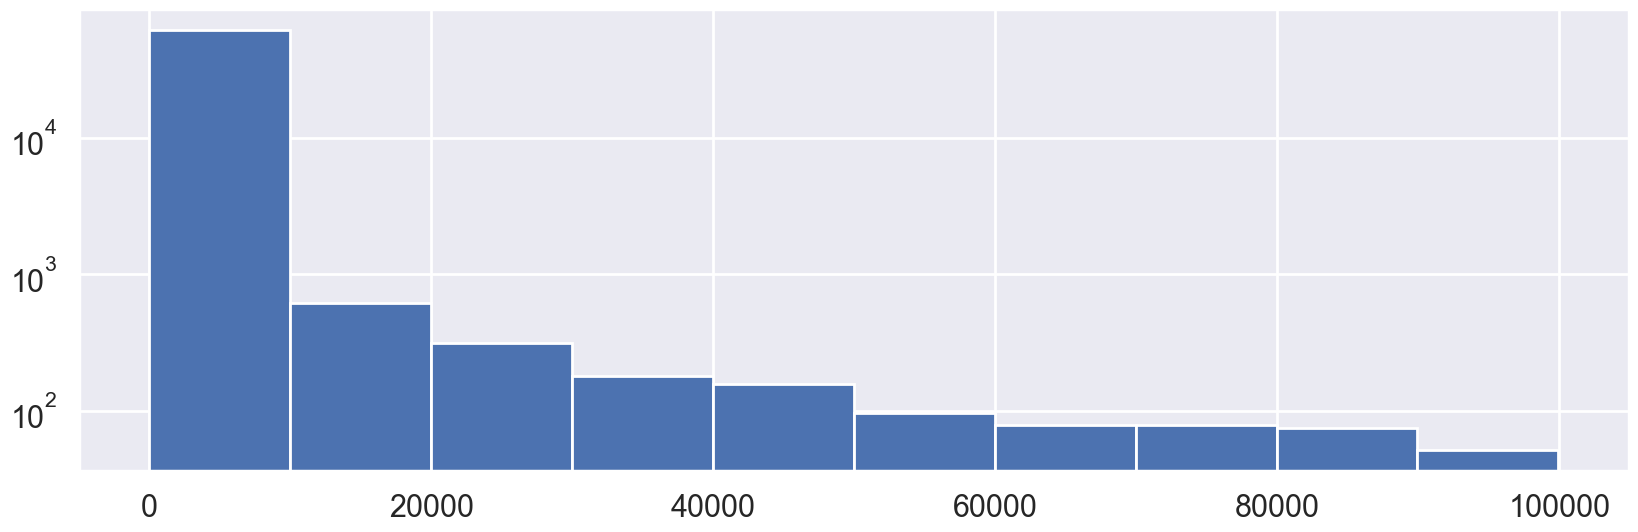

In [155]:
a = generate_non_uniform(n, k, eps)
# print(Counter(a))
ax = pd.Series(a).hist(figsize=(20,6))
ax.set_yscale('log')

<AxesSubplot:>

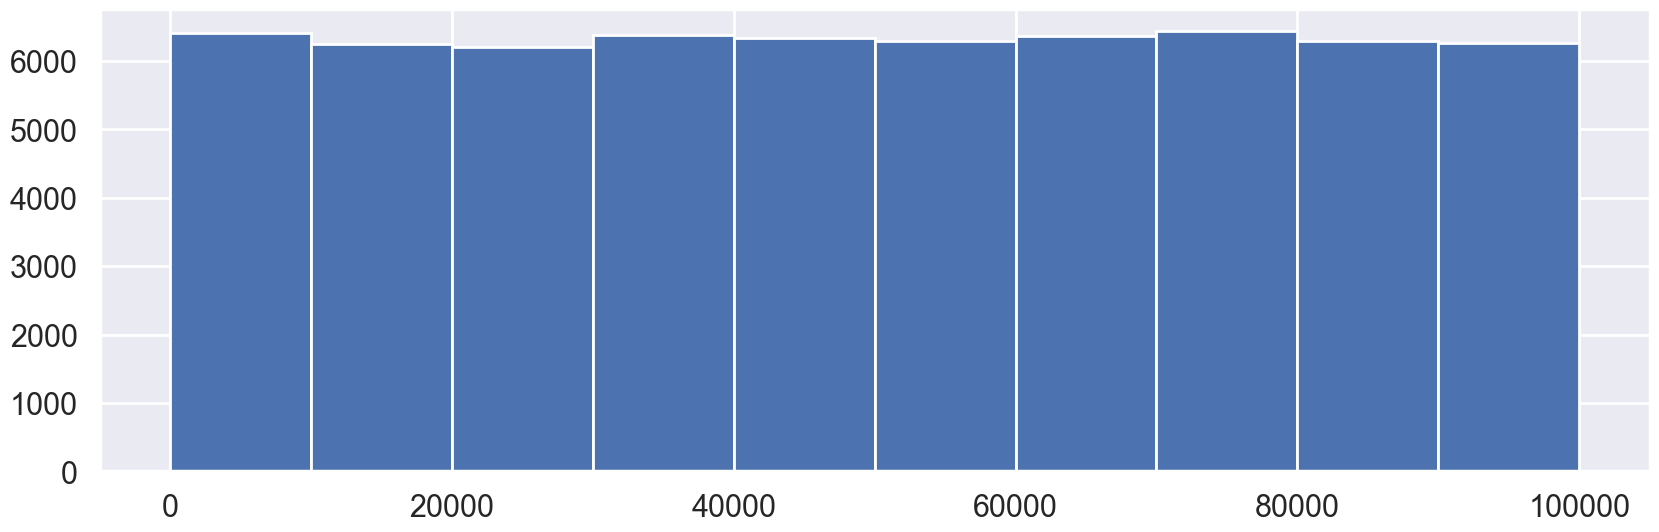

In [156]:
pd.Series(generate_uniform(n, k)).hist(figsize=(20,6))